# Visualize Time Series

Time series model output visualization 101 with prophet.

Doc: https://facebook.github.io/prophet/docs/quick_start.html 

## Import libraries and data

In [20]:
 ! pip install prophet

import pandas as pd
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Python
df = pd.read_csv('/content/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


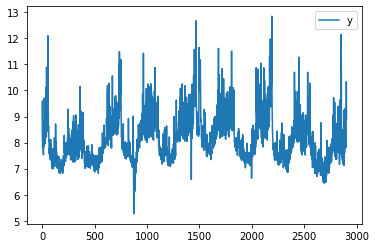

In [5]:
df.plot()

### Define holidays

In [6]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

## Fit model

In [22]:
# Python
m = Prophet(holidays=holidays, weekly_seasonality=False, daily_seasonality=True)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

In [23]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


## Make Prediction

In [9]:
# Python
# cap = 1000000
# floor = 0
forecast = m.predict(future)

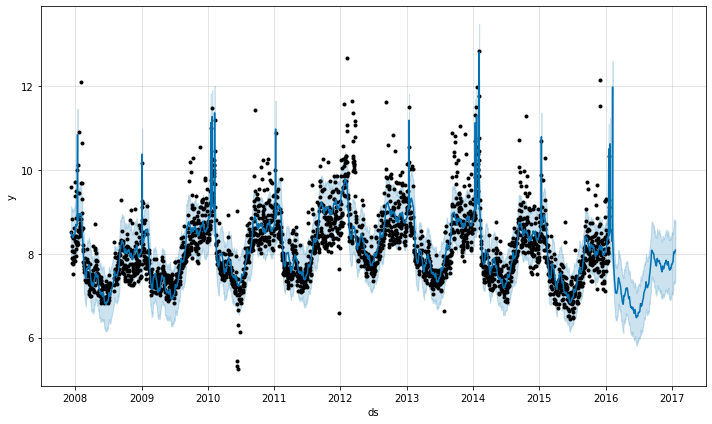

In [10]:
# Python
fig1 = m.plot(forecast)

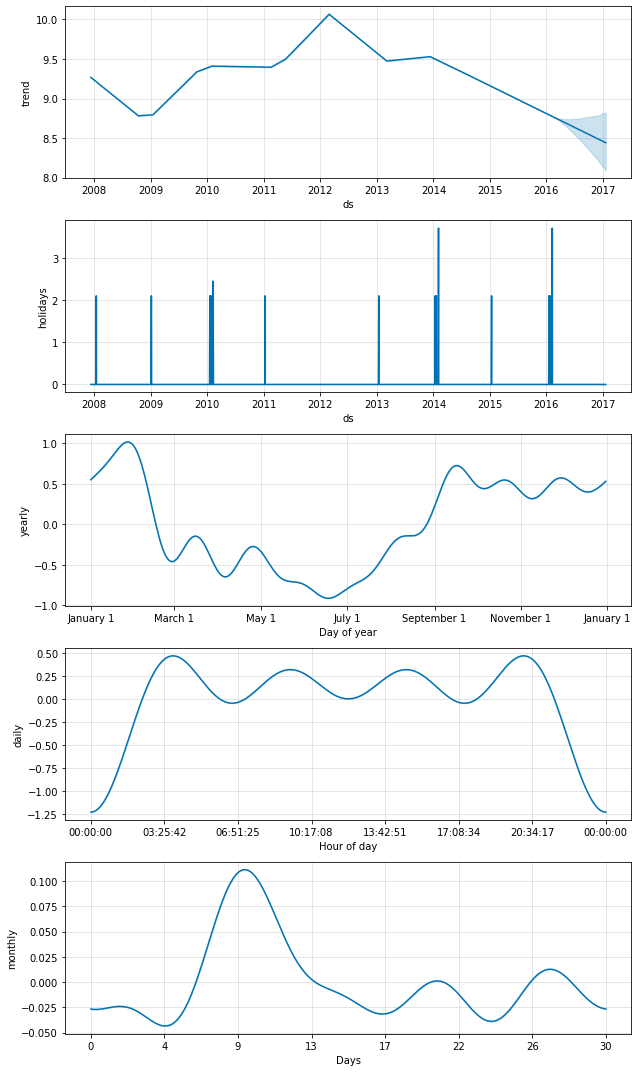

In [15]:
# Python
fig2 = m.plot_components(forecast)

In [16]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [19]:
forecast[forecast["ds"]=="2016-04-06"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
2981,2016-04-06,6.795915,6.203391,7.482256
